### Creates a histogram of node degrees

In [1]:
#Importing required libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#### Create a Graph

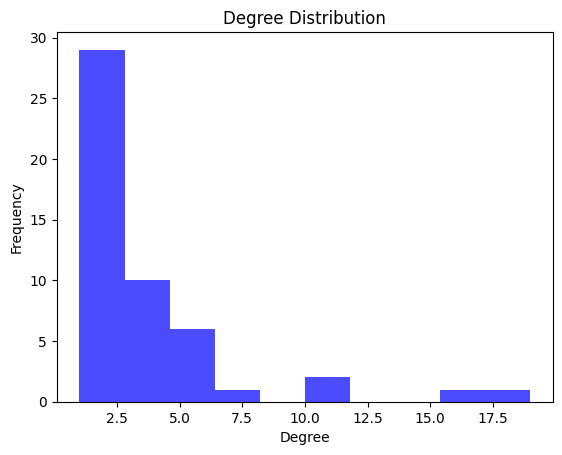

In [4]:
# Create a Graph
G = nx.barabasi_albert_graph(50, 2)  # Scale-free network with 50 nodes, 2 edges per node

# 1. Degree Distribution
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees, bins=10, color='blue', alpha=0.7)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

##### Power Law Verification

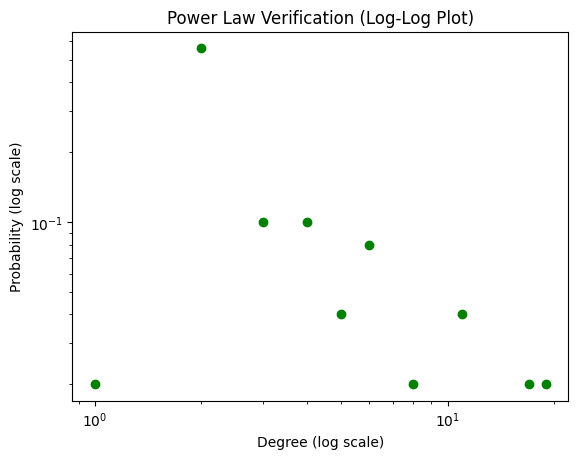

In [5]:
# 2. Power Law Verification
counts, bins = np.histogram(degrees, bins=range(1, max(degrees) + 2))
probability = counts / sum(counts)
plt.loglog(bins[:-1], probability, marker='o', linestyle='none', color='green')
plt.title("Power Law Verification (Log-Log Plot)")
plt.xlabel("Degree (log scale)")
plt.ylabel("Probability (log scale)")
plt.show()

In [6]:
# 3. Diameter
if nx.is_connected(G):
    diameter = nx.diameter(G)  # Longest shortest path
else:
    diameter = max(nx.diameter(G.subgraph(c)) for c in nx.connected_components(G))

print("Graph Diameter:", diameter)

Graph Diameter: 5


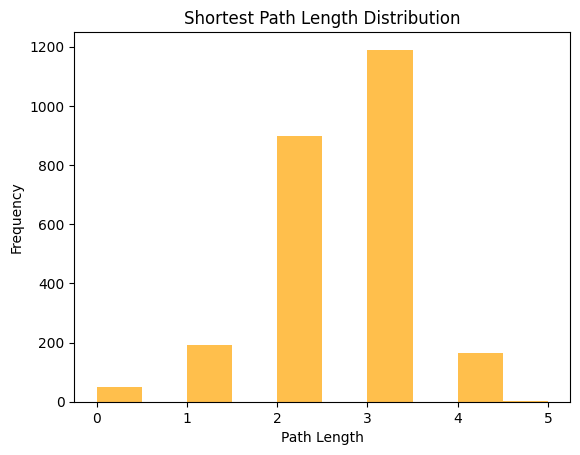

In [7]:
# 4. Shortest Path Length Distribution
lengths = dict(nx.shortest_path_length(G))
all_lengths = [lengths[u][v] for u in lengths for v in lengths[u]]
plt.hist(all_lengths, bins=10, color='orange', alpha=0.7)
plt.title("Shortest Path Length Distribution")
plt.xlabel("Path Length")
plt.ylabel("Frequency")
plt.show()

Explanation of the Code
Degree Distribution:

Creates a histogram of node degrees.
Visualizes node connectivity in the graph.
Power Law Verification:

Plots the probability distribution in log-log scale to check if it follows a power law.
Diameter:

Computes the longest shortest path to determine the diameter of the graph.
Shortest Path Length Distribution:

Analyzes path lengths to measure reachability within the network.